# Multiple Linear Regression in Python

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame

In [5]:
Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }


In [13]:
df = DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price'])

In [14]:
df

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256
5,2017,7,2.50,5.6,1254
6,2017,6,2.50,5.5,1234
7,2017,5,2.25,5.5,1195
8,2017,4,2.25,5.5,1159
9,2017,3,2.25,5.6,1167


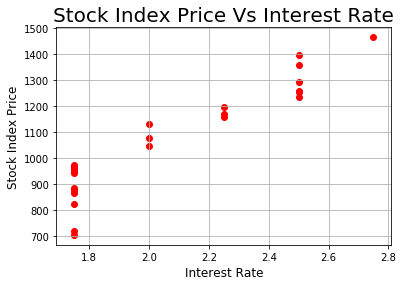

In [19]:
plt.scatter(df['Interest_Rate'],df['Stock_Index_Price'],color='red')
plt.title('Stock Index Price Vs Interest Rate',fontsize=20)
plt.xlabel('Interest Rate',fontsize=12)
plt.ylabel('Stock Index Price',fontsize=12)
plt.grid(True)
plt.show()

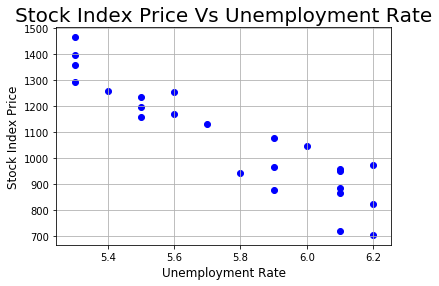

In [20]:
plt.scatter(df['Unemployment_Rate'],df['Stock_Index_Price'],color='blue')
plt.title('Stock Index Price Vs Unemployment Rate',fontsize=20)
plt.xlabel('Unemployment Rate',fontsize=12)
plt.ylabel('Stock Index Price',fontsize=12)
plt.grid(True)
plt.show()

As you can see, a linear relationship exists in both cases:

In the first case, when interest rates go up, the stock index price also goes up
In the second case, when unemployment rates go up, the stock index price goes down (here we still have a linear relationship, but with a negative slope)

In [30]:
X = df[['Interest_Rate','Unemployment_Rate']]
y = df ['Stock_Index_Price']

In [31]:
from sklearn.linear_model import LinearRegression
reger = LinearRegression()
reger.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
print('Intercept: \n',reger.intercept_)
print('Coefficients: \n',reger.coef_)

Intercept: 
 1798.4039776258546
Coefficients: 
 [ 345.54008701 -250.14657137]


This output includes the intercept and coefficients. You can use this information to build the multiple linear regression equation as follows:

Stock_Index_Price = (Intercept) + (Interest_Rate coef)*X1 + (Unemployment_Rate coef)*X2

And once you plug the numbers:

Stock_Index_Price = (1798.4040) + (345.5401)*X1 + (-250.1466)*X2

# prediction with sklearn

New_Interest_Rate = 2.75
New_Unemployment_Rate = 5.3

In [43]:
print ('Predicted Stock Index Price: \n', reger.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))

Predicted Stock Index Price: 
 [1422.86238865]


Imagine that you want to predict the stock index price after you collected the following data:

Interest Rate = 2.75 (i.e., X1= 2.75)
Unemployment Rate = 5.3 (i.e., X2= 5.3)
If you plug that data into the regression equation, you’ll get the exact same predicted results as displayed in the second part:

Stock_Index_Price = (1798.4040) + (345.5401)*(2.75) + (-250.1466)*(5.3) = 1422.86

# The third part displays a comprehensive table with statistical info generated by statsmodels.

In [39]:
import statsmodels.api as sm
X = sm.add_constant(X)

E:\an\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [40]:
model =sm.OLS(y,X).fit()

In [41]:
predection = model.predict(X)

In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Stock_Index_Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Fri, 12 Jul 2019   Prob (F-statistic):           4.04e-11
Time:                        02:31:34   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1798.4040    899.248      2.000      0.059     -71.685    3668.493
Interest_Rate       345.5401    111.367      3.103      0.005     113.940     577.140
Unemployment_Rate  -250.1466    117.950     -2.121      0.046    -495.437      -4.856
==============================================================================
Omnibus:                        2.691   Durbin-Watson:                   0.530
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.551
Skew:                          -0.612   Prob(JB):                        0.461
Kurtosis:                       3.226   Cond. No.                         394.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# GUI used for the Multiple Linear Regression in Python


In [48]:
import tkinter as tk
root =tk.Tk()

In [51]:
canvas1 = tk.Canvas(root, width = 1200, height = 450)

In [52]:
canvas1.pack()

In [54]:
Intercept_result = ('Intercept: ', reger.intercept_)
label_Intercept = tk.Label(root, text=Intercept_result, justify = 'center')
canvas1.create_window(260, 220, window=label_Intercept)


1

In [56]:
Coefficients_result  = ('Coefficients: ', reger.coef_)
label_Coefficients = tk.Label(root, text=Coefficients_result, justify = 'center')
canvas1.create_window(260, 240, window=label_Coefficients)


2

In [58]:
Coefficients_result  = ('Coefficients: ', reger.coef_)
label_Coefficients = tk.Label(root, text=Coefficients_result, justify = 'center')
canvas1.create_window(260, 240, window=label_Coefficients)


3

In [59]:
label1 = tk.Label(root, text='Type Interest Rate: ')
canvas1.create_window(100, 100, window=label1)



4

In [60]:
entry1 = tk.Entry (root) # create 1st entry box
canvas1.create_window(270, 100, window=entry1)

# New_Unemployment_Rate label and input box
label2 = tk.Label(root, text=' Type Unemployment Rate: ')
canvas1.create_window(120, 120, window=label2)

entry2 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(270, 120, window=entry2)


def values(): 
    global New_Interest_Rate #our 1st input variable
    New_Interest_Rate = float(entry1.get()) 
    
    global New_Unemployment_Rate #our 2nd input variable
    New_Unemployment_Rate = float(entry2.get()) 
    
    Prediction_result  = ('Predicted Stock Index Price: ', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='orange')
    canvas1.create_window(260, 280, window=label_Prediction)
    
button1 = tk.Button (root, text='Predict Stock Index Price',command=values, bg='orange') # button to call the 'values' command above 
canvas1.create_window(270, 150, window=button1)
 

root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "E:\an\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-60-69e6731cc7c7>", line 19, in values
    Prediction_result  = ('Predicted Stock Index Price: ', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))
NameError: name 'regr' is not defined
Exception in Tkinter callback
Traceback (most recent call last):
  File "E:\an\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-60-69e6731cc7c7>", line 19, in values
    Prediction_result  = ('Predicted Stock Index Price: ', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))
NameError: name 'regr' is not defined
Exception in Tkinter callback
Traceback (most recent call last):
  File "E:\an\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-60-69e6731cc7c7>", line 19, in values
    Prediction_result  = ('Predicte